## Méthode Linear Regression sur le dataset LivingRoom_preprocessed_hack

In [13]:
import os

import pandas as pd
import s3fs
import zipfile
import matplotlib.pyplot as plt

### Récupérer les données du challenge

In [14]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [15]:
# Lister les challenges
fs.ls("gvimont/diffusion/hackathon-minarm-2024")

['gvimont/diffusion/hackathon-minarm-2024/AIVSAI',
 'gvimont/diffusion/hackathon-minarm-2024/Acoustique',
 'gvimont/diffusion/hackathon-minarm-2024/Similarité']

In [16]:
# Lister les fichiers d'un challenge
fs.ls("gvimont/diffusion/hackathon-minarm-2024/Acoustique")

['gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip']

In [17]:
# Télécharger les données dans le service
PATH_IN = 'gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip'
fs.download(PATH_IN, 'data/LivingRoom_preprocessed_hack.zip')

KeyboardInterrupt: 

In [ ]:
# Décompresser les données
with zipfile.ZipFile("data/LivingRoom_preprocessed_hack.zip","r") as zip_file:
    zip_file.extractall("data/")

NB : les données peuvent être également téléchargées directement si besoin, pour être utilisées hors du SSP CLoud.
Exemple pour le fichier ci-dessus (même format de lien pour les autres challenges) : 

http://minio.lab.sspcloud.fr/gvimont/diffusion/hackathon-minarm-2024/AIVSAI/HC3.zip

### Exporter des données

In [ ]:
import numpy as np
import pandas as pd

# Load the Empty Room .npy file
data_array_empty = np.load('data/LivingRoom_preprocessed_hack/Empty/deconvolved.npy')
print(data_array_empty.shape)

# Load the Human1 Room .npy file
data_array_H1_centroid = np.load('data/LivingRoom_preprocessed_hack/Human1/centroid.npy')
data_array_H1_deconvoled = np.load('data/LivingRoom_preprocessed_hack/Human1/deconvoled_trim.npy')
data_array_H1_skeletons = np.load('data/LivingRoom_preprocessed_hack/Human1/skeletons.npy')
print(data_array_H1_deconvoled)

# Load the Human2 Room .npy file
data_array_H2_centroid = np.load('data/LivingRoom_preprocessed_hack/Human2/centroid.npy')
data_array_H2_deconvoled = np.load('data/LivingRoom_preprocessed_hack/Human2/deconvoled_trim.npy')
data_array_H2_skeletons = np.load('data/LivingRoom_preprocessed_hack/Human2/skeletons.npy')
print(data_array_H2_deconvoled)


(100, 10, 667200)
[[[ 9.07240337e-06  1.71257434e-05  1.22597794e-05 ...  8.86178623e-06
    1.40686043e-05  1.06616626e-05]
  [-8.23853679e-06 -8.23373648e-06 -8.74563466e-06 ...  2.87394778e-06
   -8.90485808e-06 -3.52464713e-06]
  [ 6.62780906e-07 -1.40201587e-06  1.83228190e-06 ... -1.06218545e-06
    8.53497477e-06  2.28155182e-06]
  [ 8.11119719e-07 -2.47451499e-06  5.82140547e-06 ...  7.73804004e-06
    2.29692650e-05  1.10566034e-05]]

 [[ 1.64466037e-05  1.53698293e-05  1.91599720e-05 ...  1.76548729e-05
    1.70955263e-05  1.41169767e-05]
  [ 1.05826217e-07  9.13145777e-06  1.76140716e-07 ...  1.21369967e-05
    1.55958387e-05  1.23088676e-05]
  [ 7.06836090e-06  3.26818258e-06  7.15508941e-06 ...  4.64980394e-06
    8.96262554e-06  6.55734584e-06]
  [-3.18089551e-05 -8.93297238e-06 -2.51026504e-05 ... -7.02741545e-07
    1.34268867e-05  3.24307348e-06]]

 [[ 4.71092753e-05  4.42863784e-05  4.81883108e-05 ...  5.11715079e-05
    4.54165129e-05  4.68136932e-05]
  [-2.25045878e

In [23]:
print(data_array_H1_skeletons.shape)
print(data_array_H2_skeletons.shape)

(1000, 3, 32, 3)
(104, 3, 32, 3)


### Travail sur la salle H1

**Affichage du centroid**

In [22]:
print(data_array_H1_centroid)

[[-3231.3293467  -1127.87771457]
 [-3198.54107875  -744.5100656 ]
 [-3192.9776274   -248.26678827]
 ...
 [-1717.89923578 -3166.59648491]
 [-1808.60337549 -2779.13038427]
 [   44.43741322   106.48353609]]


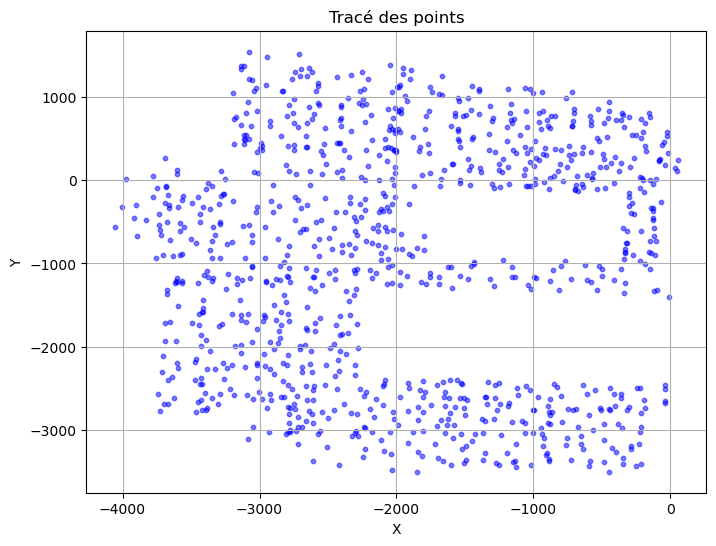

In [21]:
x = data_array_H1_centroid[:, 0]
y = data_array_H1_centroid[:, 1]

# Tracer les points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, c='blue', marker='o', alpha=0.5)  # s: taille des points, c: couleur, marker: type de marqueur, alpha: transparence
plt.title('Tracé des points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

**Affichage et process du deconvoled**

In [20]:
print(data_array_H1_deconvoled.shape)
print(data_array_H1_deconvoled)

(1000, 4, 667200)
[[[ 9.07240337e-06  1.71257434e-05  1.22597794e-05 ...  8.86178623e-06
    1.40686043e-05  1.06616626e-05]
  [-8.23853679e-06 -8.23373648e-06 -8.74563466e-06 ...  2.87394778e-06
   -8.90485808e-06 -3.52464713e-06]
  [ 6.62780906e-07 -1.40201587e-06  1.83228190e-06 ... -1.06218545e-06
    8.53497477e-06  2.28155182e-06]
  [ 8.11119719e-07 -2.47451499e-06  5.82140547e-06 ...  7.73804004e-06
    2.29692650e-05  1.10566034e-05]]

 [[ 1.64466037e-05  1.53698293e-05  1.91599720e-05 ...  1.76548729e-05
    1.70955263e-05  1.41169767e-05]
  [ 1.05826217e-07  9.13145777e-06  1.76140716e-07 ...  1.21369967e-05
    1.55958387e-05  1.23088676e-05]
  [ 7.06836090e-06  3.26818258e-06  7.15508941e-06 ...  4.64980394e-06
    8.96262554e-06  6.55734584e-06]
  [-3.18089551e-05 -8.93297238e-06 -2.51026504e-05 ... -7.02741545e-07
    1.34268867e-05  3.24307348e-06]]

 [[ 4.71092753e-05  4.42863784e-05  4.81883108e-05 ...  5.11715079e-05
    4.54165129e-05  4.68136932e-05]
  [-2.25045878e

In [19]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.6 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.9 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 51.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 85.3 MB/s eta 0:00:00ta 

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

2024-04-23 18:08:58.841130: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:08:58.846847: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 18:08:58.902665: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 18:08:59.821391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
# Calcul de la RMS pour chaque canal (microphone)
rms_data = np.sqrt(np.mean(np.square(data_array_H1_deconvoled), axis=2))

# Normaliser les données RMS
scaler = StandardScaler()
rms_data_normalized = scaler.fit_transform(rms_data.reshape(-1, 4)).reshape(rms_data.shape)

In [38]:
print(rms_data_normalized.shape)
print(rms_data_normalized)

(1000, 4)
[[  0.807686     0.89319843   0.3703625    0.55446833]
 [  0.6148092    0.5601817    0.32530993   0.49623522]
 [  0.6670591    0.46835804   0.26275572   0.5050229 ]
 ...
 [  0.48971906   0.02091012  -0.3304132   -0.05839473]
 [  0.38563752  -0.5528933   -0.33424938  -0.18044513]
 [  0.38350895   0.30132347 -10.254325    -4.594716  ]]


In [27]:

# Vérifier que les données ont la même longueur
assert rms_data_normalized.shape[0] == data_array_H1_centroid.shape[0]

# Diviser les données en ensembles d'entraînement et de test
split_ratio = 0.8
split_index = int(split_ratio * len(rms_data_normalized))

train_audio, test_audio = rms_data_normalized[:split_index], rms_data_normalized[split_index:]
train_centroid, test_centroid = data_array_H1_centroid[:split_index], data_array_H1_centroid[split_index:]


In [40]:
#ne pas prendre en compte c'était juste des tests de ma part
train_audio = train_audio.reshape(train_audio.shape[0], train_audio.shape[1], 1)
test_audio = test_audio.reshape(test_audio.shape[0], test_audio.shape[1], 1)


In [41]:
#affichage des tailles des train/test pour vérifier
print(train_audio.shape)
print(test_audio.shape)
print(train_centroid.shape)
print(test_centroid.shape)

(800, 4, 1)
(200, 4, 1)
(800, 2)
(200, 2)


**Méthode #1: Construire le modèle de regression à la main**

In [48]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Données d'entraînement
X_train = train_audio.reshape(train_audio.shape[0], -1)  # Aplatir les données audio
y_train = train_centroid

# Données de test
X_test = test_audio.reshape(test_audio.shape[0], -1)  # Aplatir les données audio
y_test = test_centroid

# Définir le modèle de régression linéaire
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(X_train.shape[1],))
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur les données de test
mse, mae = model.evaluate(X_test, y_test)
print("Test MSE:", mse)
print("Test MAE:", mae)

# Prédictions sur les données de test
predictions = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne
test_mse = mean_squared_error(y_test, predictions)
print("Test MSE (from sklearn):", test_mse)


/opt/mamba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3636015.2500 - mae: 1577.3925 - val_loss: 4590143.5000 - val_mae: 1832.8997
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3766408.2500 - mae: 1616.1530 - val_loss: 4590108.0000 - val_mae: 1832.8926
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3713750.7500 - mae: 1603.3823 - val_loss: 4590078.5000 - val_mae: 1832.8865
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3783308.7500 - mae: 1615.1852 - val_loss: 4590028.0000 - val_mae: 1832.8762
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3761607.2500 - mae: 1603.8849 - val_loss: 4589996.5000 - val_mae: 1832.8699
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3579108.7500 - mae: 1559.0017 - val_loss: 4589964.0000 - val_mae: 1832.8635
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3801847.2500 - mae: 1619.2937 - val_loss: 4589921.0000 - val_mae: 1832.8547
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3615706.

MSE et MAE trop importante, on peut essayer avec une autre méthode.

**Méthode #2: Utiliser le modèle de Regression de sklearn**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# aplatir les données
X_train_flat = train_audio.reshape(train_audio.shape[0], -1)
X_test_flat = test_audio.reshape(test_audio.shape[0], -1)

# initialiser le modèle de régression
linear_regression_model = LinearRegression()

# entraîner le modèle avec les données d'entraînements
linear_regression_model.fit(X_train_flat, train_centroid)

# faire les prédictions avec le dataset de test
predictions = linear_regression_model.predict(X_test_flat)

# évaluer le modèle
mse = mean_squared_error(test_centroid, predictions)
mae = mean_absolute_error(test_centroid, predictions)
r2 = r2_score(test_centroid, predictions)




print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R²:", r2)


Test MSE: 1867180.4359605347
Test MAE: 1144.0633101380565
Test R²: 0.027847632448877946


On a une meilleure MSE et une meilleure MAE.

In [65]:
#j'ai affiché les predictions et les valeurs réelles pour voir la différence
print(predictions)
#print(test_centroid)

[[-2144.6636    -486.12387 ]
 [-2521.459      155.85931 ]
 [-2167.2307    -610.8237  ]
 [-2099.2627    -535.099   ]
 [-1750.1545    -656.9459  ]
 [-1624.064     -951.8827  ]
 [-1994.3605    -790.6887  ]
 [-2199.135     -568.6044  ]
 [-1366.7092   -1097.7041  ]
 [ -283.83545  -1344.1934  ]
 [ -832.3877    -383.80762 ]
 [ -710.3325    -397.57172 ]
 [ -241.1134    -739.57947 ]
 [-1720.3455    -404.18872 ]
 [-1534.3519    -636.0217  ]
 [-1404.8018   -1252.2693  ]
 [-1298.9373   -1059.9868  ]
 [-2101.5166    -463.48877 ]
 [-2165.6472    -372.94287 ]
 [-2162.5796    -433.5474  ]
 [-2349.9485    -271.2079  ]
 [-2376.2537     -87.233215]
 [-2484.674       34.399048]
 [-2246.6653    -238.9267  ]
 [-2346.7183   -2389.7058  ]
 [-2185.539    -1866.7717  ]
 [-2469.7334   -1953.7847  ]
 [-2443.162    -2001.0798  ]
 [-2184.3503   -1954.0544  ]
 [-2442.5676   -1888.6306  ]
 [-2419.0608   -1842.1605  ]
 [-2399.767    -1781.7415  ]
 [-2151.5059   -1803.1548  ]
 [-2427.0037   -2056.2004  ]
 [-2469.44    

In [73]:
# fonction de calcul d'accuracy avec un écart de tolérance
def calculate_accuracy(y_true, y_pred, threshold):
    # calcul de la distance entre la valeur réelle et la valeur prédite
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    # compter le nombre de prédictions justes
    correct_predictions = np.sum(distances < threshold)
    # calcul de la précision
    accuracy = correct_predictions / len(y_true)
    return accuracy

# définir un écart de tolérance
threshold = 50000  # Adjust this threshold as needed

# calcul de l'accuracy pour le modèle #2
accuracy = calculate_accuracy(test_centroid, predictions, threshold)
print("Accuracy:", accuracy)

Accuracy: 1.0


On a vu qu'avec le modèle de régression, on améliore notre MSE et MAE. On peut essayer de cumuler plusieurs méthodes pour améliorer notre précision.

**Méthode #3: la régression linéaire avec régularisation (Ridge) et optimisation des hyperparamètres pour trouver les valeurs optimales des paramètres du modèle (recherche par grille)**

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Définir le modèle de régression Ridge
ridge_model = Ridge()

# Définir les hyperparamètres à optimiser
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_flat, train_centroid)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Prédire sur les données de test
predictions = best_model.predict(X_test_flat)

# Calculer les métriques d'évaluation
mse = mean_squared_error(test_centroid, predictions)
mae = mean_absolute_error(test_centroid, predictions)
r2 = r2_score(test_centroid, predictions)

print("Test MSE:", mse)
print("Test MAE:", mae)
print("Test R²:", r2)


Best Parameters: {'alpha': 10.0}
Test MSE: 1863139.4259102251
Test MAE: 1143.8993184258095
Test R²: 0.030456183535098158


pour un alpha de 10, on a la meilleure MSE et MAE. Cependant, elle reste semblable à celle de la méthode précédente

In [76]:
from sklearn.linear_model import LinearRegression

# Feature engineering (calculate overall RMS levels)
X_train_levels = np.sqrt(np.mean(np.square(train_audio), axis=1))
X_test_levels = np.sqrt(np.mean(np.square(test_audio), axis=1))

# Initialize Linear Regression model
linear_regression_model = LinearRegression()

# Train the Linear Regression model
linear_regression_model.fit(X_train_levels, train_centroid)

# Predict on the test set
predictions_linear_regression = linear_regression_model.predict(X_test_levels)

# Evaluate the model
mse_linear_regression = mean_squared_error(test_centroid, predictions_linear_regression)
mae_linear_regression = mean_absolute_error(test_centroid, predictions_linear_regression)
r2_linear_regression = r2_score(test_centroid, predictions_linear_regression)

print("Linear Regression on Levels - Test MSE:", mse_linear_regression)
print("Linear Regression on Levels - Test MAE:", mae_linear_regression)
print("Linear Regression on Levels - Test R²:", r2_linear_regression)


Linear Regression on Levels - Test MSE: 1990667.2467699246
Linear Regression on Levels - Test MAE: 1221.4165740435378
Linear Regression on Levels - Test R²: -0.06208489326631117


In [69]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculer la moyenne, la variance, le skewness et la kurtosis des signaux audio
X_train_mean = np.mean(train_audio, axis=1)
X_train_var = np.var(train_audio, axis=1)
X_train_skew = skew(train_audio, axis=1)
X_train_kurtosis = kurtosis(train_audio, axis=1)

X_test_mean = np.mean(test_audio, axis=1)
X_test_var = np.var(test_audio, axis=1)
X_test_skew = skew(test_audio, axis=1)
X_test_kurtosis = kurtosis(test_audio, axis=1)

# Concaténer toutes les caractéristiques en une seule matrice pour l'entraînement
X_train_features = np.column_stack((X_train_levels, X_train_mean, X_train_var, X_train_skew, X_train_kurtosis))
X_test_features = np.column_stack((X_test_levels, X_test_mean, X_test_var, X_test_skew, X_test_kurtosis))

# Entraîner le modèle (par exemple, régression linéaire)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_features, train_centroid)

# Prédire sur les données de test
predictions_linear_regression = linear_regression_model.predict(X_test_features)

# Évaluer le modèle
mse_linear_regression = mean_squared_error(test_centroid, predictions_linear_regression)
mae_linear_regression = mean_absolute_error(test_centroid, predictions_linear_regression)
r2_linear_regression = r2_score(test_centroid, predictions_linear_regression)

print("Linear Regression with Additional Features - Test MSE:", mse_linear_regression)
print("Linear Regression with Additional Features - Test MAE:", mae_linear_regression)
print("Linear Regression with Additional Features - Test R²:", r2_linear_regression)


Linear Regression with Additional Features - Test MSE: 1808099.5570678846
Linear Regression with Additional Features - Test MAE: 1142.3896880982284
Linear Regression with Additional Features - Test R²: 0.013684248181541125


### Travail sur la salle H2

**Affichage du centroid**

In [ ]:
print(data_array_H2_centroid)

[[-2406.85413008 -2443.62906004]
 [-1923.16230038 -2504.30576997]
 [-1615.29307549 -2525.71107555]
 [-1234.84729435 -2581.21590946]
 [ -906.89320474 -2648.96828851]
 [ -579.82451164 -2563.38746474]
 [ -258.89043633 -2501.99822189]
 [ -237.00812692 -2957.79113999]
 [ -608.16773853 -2894.26845589]
 [ -920.67771947 -2892.68441764]
 [-1177.38289287 -3050.12473983]
 [-1690.95162773 -3023.00826184]
 [-1968.49135428 -3048.59689339]
 [-2401.44182176 -2925.40384273]
 [-2626.65068051 -2353.52639219]
 [-2945.10567004 -2270.29924636]
 [-3288.80884616 -2179.77519901]
 [-3543.43725461 -2122.72140672]
 [-3818.97939345 -2074.06640841]
 [-3787.00508742 -1745.78914635]
 [-3440.47071217 -1786.24662486]
 [-3126.89926719 -1778.7456592 ]
 [-2780.8277654  -1806.35696377]
 [-2443.03492952 -1839.64542774]
 [-2359.37110303 -1517.60616977]
 [-2643.69001771 -1476.99863966]
 [-3045.54399981 -1635.42668901]
 [-3302.78792751 -1472.55710516]
 [-3760.33837488 -1417.04328708]
 [-4041.78587419 -1398.58686915]
 [-3651.45

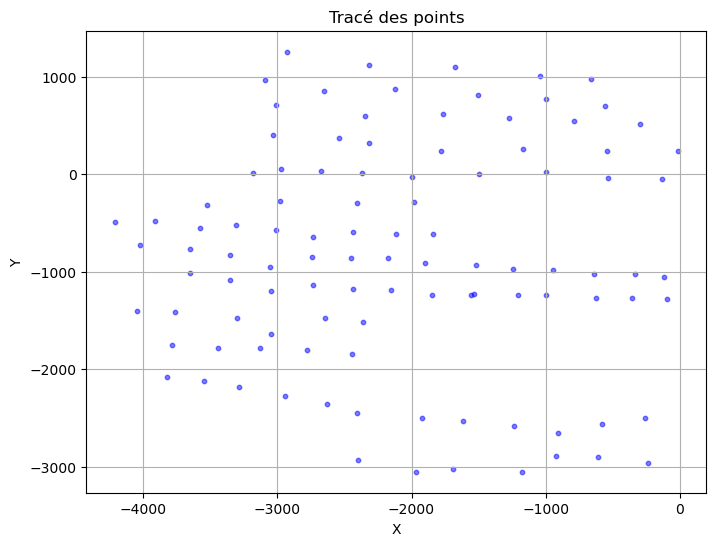

In [ ]:
x = data_array_H2_centroid[:, 0]
y = data_array_H2_centroid[:, 1]

# Tracer les points
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, c='blue', marker='o', alpha=0.5)  # s: taille des points, c: couleur, marker: type de marqueur, alpha: transparence
plt.title('Tracé des points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

**Affichage et process du deconvoled**